# Chapter 1. Gaining Early Insights from Textual Data

In [36]:
from pathlib import Path
import pandas as pd

import seaborn as sns
sns.set()

In [4]:
DATASET = Path("../DATASETS/1/un-general-debates-blueprint.csv")

In [6]:
df = pd.read_csv(DATASET)
df.sample(4)

,session,year,country,country_name,speaker,position,text
3962,52,1997,CZE,Czechia,Josef Zieleniec,Deputy Prime Minister,"﻿At the outset, may I\ncongratulate Mr. Hennad..."
3180,47,1992,ROU,Romania,Mr Nastase,NaN,I would like first to join previous speakers \...
5751,61,2006,TON,Tonga,Mr.Mr. Mahe 'Uli'Uli TUPOUNIUA,Deputy Prime Minister,The Tongan delegation \njoins others in congra...
2759,45,1990,COD,"Congo, The Democratic Republic of the",NDINGA OBA,NaN,"﻿Mr. President, the forty-fifth session of the..."


## Getting an overview of the Data with pandas

* Calculate summary statistics.
* Check for missing values.
* Plot distributions of interesting attributes.
* Compare distributions across categories.
* Visualize developments over time.

### Calculating Summary Statistics for Columns

In [7]:
df["length"] = df["text"].str.len()
df.describe().T # dataset contain speaches from the 25th to the 70th un debates (1970 - 2015)

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [12]:
df[["country", "speaker"]].describe(include='O').T # The dataset contain 199 unique countries & 

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


In [26]:
# Checking missing values
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [27]:
# we need to replace the missing value with some generic values

df['speaker'].fillna("unknown", inplace=True)

In [31]:
# there is a chance, the speaker's name is spelled differently.
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

### Plotting Value Distributions

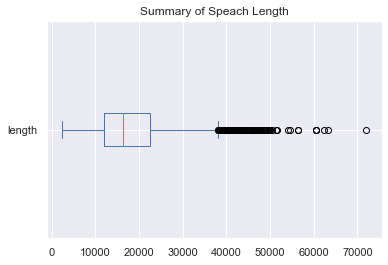

In [37]:
df["length"].plot(kind="box", vert=False, title="Summary of Speach Length");
# 50% of the speaches have a length rougly 12000 and 22000, with the median at about 16000.

<AxesSubplot:ylabel='Frequency'>

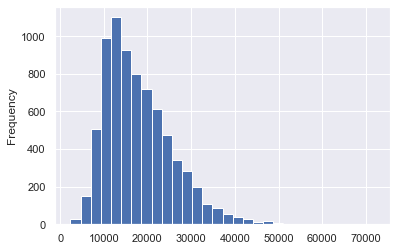

In [39]:
df["length"].plot(kind="hist", bins=30)

### Comparing Value Distributions Across Categories

In [57]:
# Peculiarities in the data often become visible when different subsets of the data are examined

where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS', 'IND'])

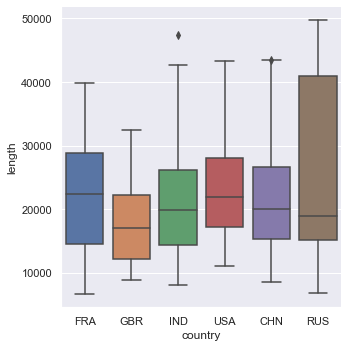

In [58]:
sns.catplot(data=df[where], x='country', y='length', kind='box');

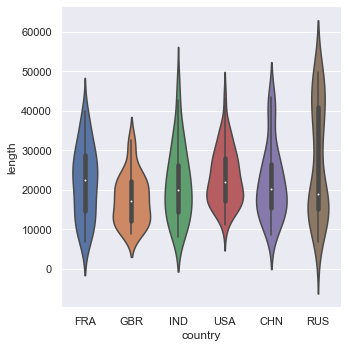

In [62]:
sns.catplot(data=df[where], x='country', y='length', kind='violin')
# RUS is much larger than for GBR but existence of multiple peaks, 
# as in Russia, only becomes apparent in the violin plot.

### Visualizing Developments Over Time

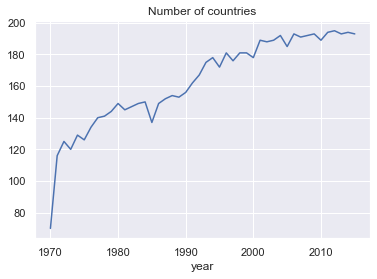

In [81]:
df.groupby('year').size().plot(title="Number of countries");

# this reflects the development of UN in each year.

<AxesSubplot:title={'center':'Avg. Speech Length'}, xlabel='year'>

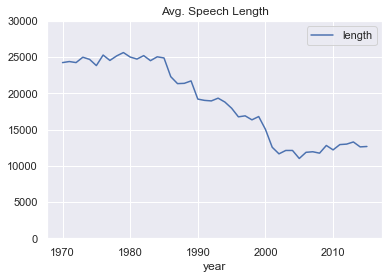

In [106]:
df.groupby('year').agg({'length': 'mean'}).plot(title="Avg. Speech Length", ylim=(0,30000))

#the speech length needed to decrease with more countries entering the debates